In [1]:
import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already thier in tensorflow
from tensorflow.keras.models import Sequential    #To create the sequential layer

from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  #To create the model
from tensorflow.keras.optimizers import Adam      #Adam optimizer
from keras.preprocessing import image             #used for image classification

from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files                    #To be able to upload files

In [2]:
uploaded = files.upload()

Saving data.zip to data (1).zip


In [3]:
!unzip data.zip

Archive:  data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


In [4]:
!rm data.zip #delete the file as it's not needed anymore

In [5]:
batch_size = 8
epoch = 30

In [9]:
directory = 'data'

train_datagen = ImageDataGenerator(validation_split=0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')        #add new pixels when the image is rotated or shifted

train_generator = train_datagen.flow_from_directory(directory,
                                                  target_size = (70,70),
                                                  batch_size = batch_size,
                                                  color_mode = "rgb",     # For Colored Images
                                                  class_mode = 'binary',  
                                                  shuffle = True,
                                                  seed = 42,            # to make result reproductive
                                                  subset = "training")    #SPECIFY this is training

validation_generation = train_datagen.flow_from_directory(directory,
                                                  target_size = (70,70),
                                                  batch_size = batch_size,
                                                  color_mode = "rgb",     # For Colored Images
                                                  class_mode = 'binary',
                                                  subset = 'validation')    #SPECIFY this is validation
 

Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


**Display a batch of the images used in the training and thier labels**


In [10]:
#generate a batch of images and labels from the training set
imgs, labels = next(train_generator)


In [11]:
#plottig Function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


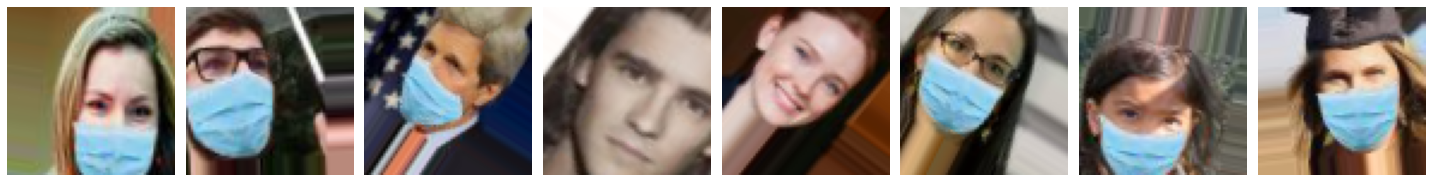

[0. 0. 0. 1. 1. 0. 0. 0.]


In [12]:
#displaying the images and thier labels where as 0 with mask and 1 without mask
plotImages(imgs)
print(labels)

In [13]:
#build Model
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(train_generator ,epochs = epoch,validation_data= validation_generation, batch_size= batch_size)

Epoch 1/30
1002/1002 [==============================] - 72s 71ms/step - loss: 0.5494 - accuracy: 0.6913 - val_loss: 0.4025 - val_accuracy: 0.8192
Epoch 2/30
1002/1002 [==============================] - 71s 71ms/step - loss: 0.3037 - accuracy: 0.8780 - val_loss: 0.3358 - val_accuracy: 0.8487
Epoch 3/30
1002/1002 [==============================] - 72s 72ms/step - loss: 0.2711 - accuracy: 0.8891 - val_loss: 0.3150 - val_accuracy: 0.8756
Epoch 4/30
1002/1002 [==============================] - 72s 72ms/step - loss: 0.2336 - accuracy: 0.9055 - val_loss: 0.3056 - val_accuracy: 0.8766
Epoch 5/30
1002/1002 [==============================] - 72s 72ms/step - loss: 0.2165 - accuracy: 0.9183 - val_loss: 0.2775 - val_accuracy: 0.8906
Epoch 6/30
1002/1002 [==============================] - 72s 72ms/step - loss: 0.1957 - accuracy: 0.9266 - val_loss: 0.2191 - val_accuracy: 0.9151
Epoch 7/30
1002/1002 [==============================] - 72s 72ms/step - loss: 0.1641 - accuracy: 0.9399 - val_loss: 0.1822 -

***Plotting the Loss and accuracy of training VS Validation***

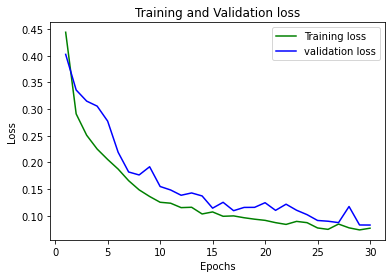

In [17]:
#Plotting the loss of validation and training 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epoch+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

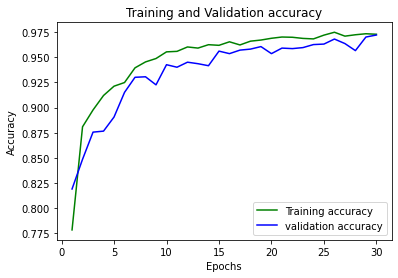

In [18]:
#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

***Testing The CNN Model***

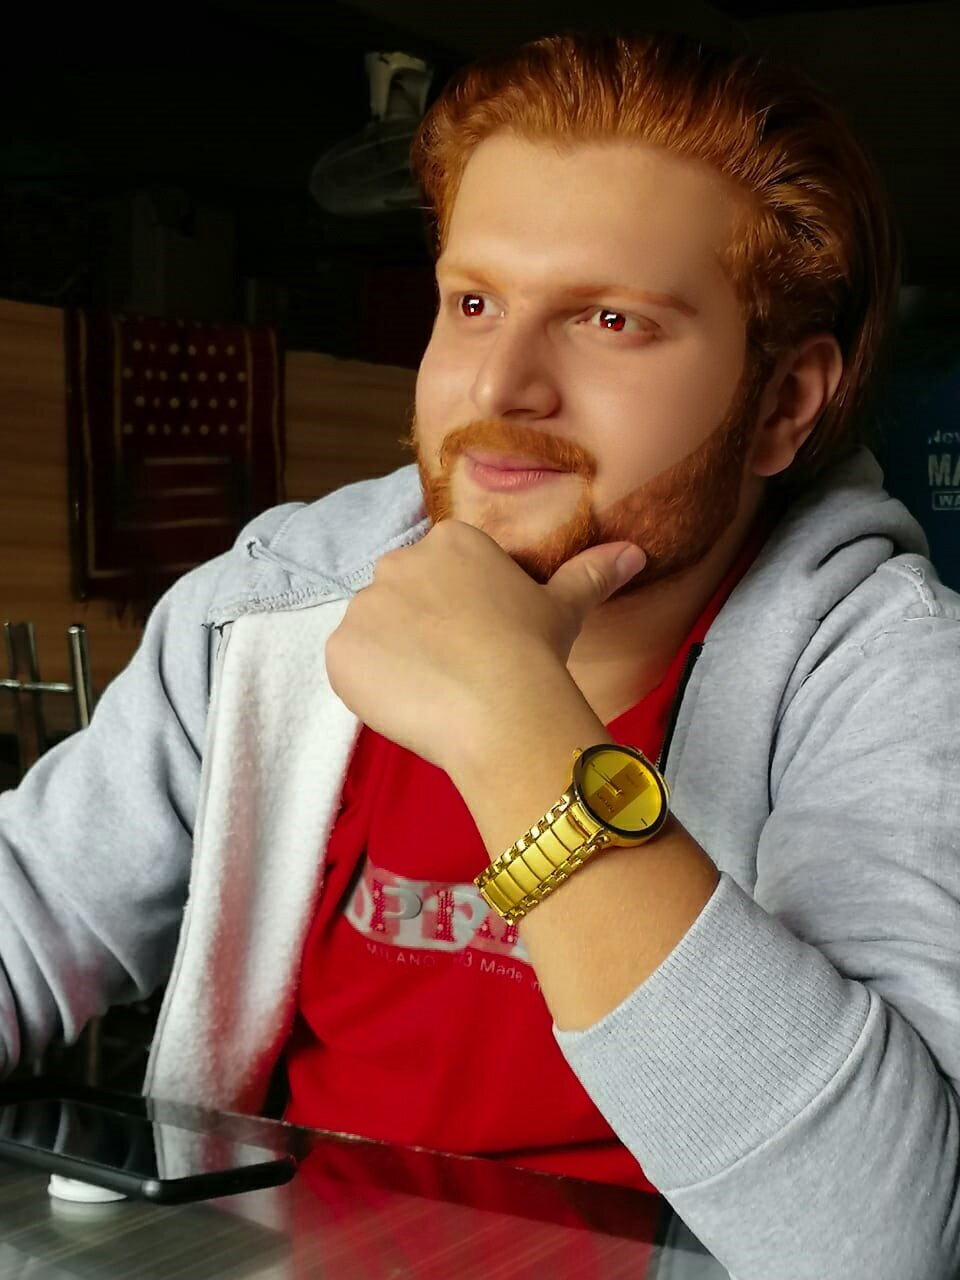



The person is not wearing a mask.



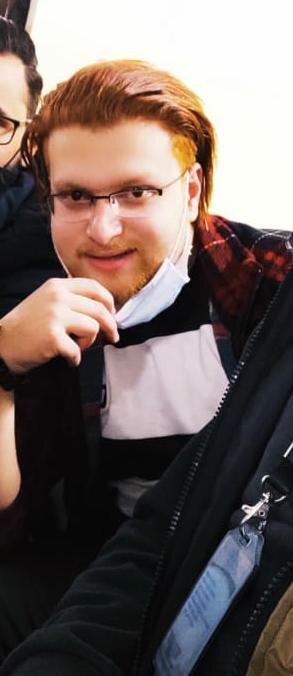



The person is not wearing a mask.



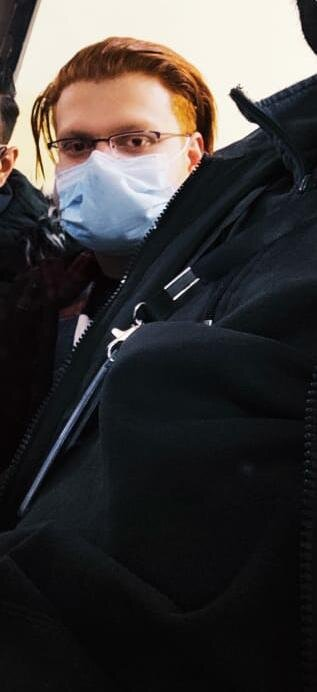



The person is not wearing a mask.



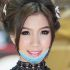



The person is not wearing a mask.



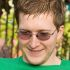



The person is not wearing a mask.



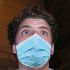



The person is wearing a mask. 



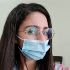



The person is wearing a mask. 



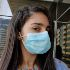



The person is wearing a mask. 



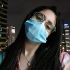



The person is wearing a mask. 



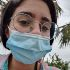



The person is wearing a mask. 



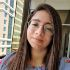



The person is not wearing a mask.



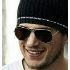



The person is not wearing a mask.



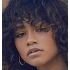



The person is not wearing a mask.



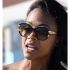



The person is not wearing a mask.



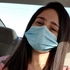



The person is wearing a mask. 



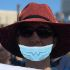



The person is not wearing a mask.



In [19]:
import numpy as np
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1,17):
  img_directory = str(i) + '.jpg'
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if (int(prediction[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")